In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, mean_squared_error
%matplotlib inline

In [130]:
df = pd.read_csv("C:/Users/victus/Documents/data.project/week-6/sentimentdataset.csv")

In [131]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [132]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [134]:
cdf = df[['Text','Platform','Sentiment','Retweets','Likes','Country','Year','Hour']]

In [135]:
cdf.head(20)

,Text,Platform,Sentiment,Retweets,Likes,Country,Year,Hour
0,Enjoying a beautiful day at the park! ...,Twitter,Positive,15.0,30.0,USA,2023,12
1,Traffic was terrible this morning. ...,Twitter,Negative,5.0,10.0,Canada,2023,8
2,Just finished an amazing workout! 💪 ...,Instagram,Positive,20.0,40.0,USA,2023,15
3,Excited about the upcoming weekend getaway! ...,Facebook,Positive,8.0,15.0,UK,2023,18
4,Trying out a new recipe for dinner tonight. ...,Instagram,Neutral,12.0,25.0,Australia,2023,19
5,Feeling grateful for the little things in lif...,Twitter,Positive,25.0,50.0,India,2023,9
6,Rainy days call for cozy blankets and hot coc...,Facebook,Positive,10.0,20.0,Canada,2023,14
7,The new movie release is a must-watch! ...,Instagram,Positive,15.0,30.0,USA,2023,19
8,Political discussions heating up on the timel...,Twitter,Negative,30.0,60.0,USA,2023,8
9,Missing summer vibes and beach days. ...,Facebook,Neutral,18.0,35.0,Australia,2023,12


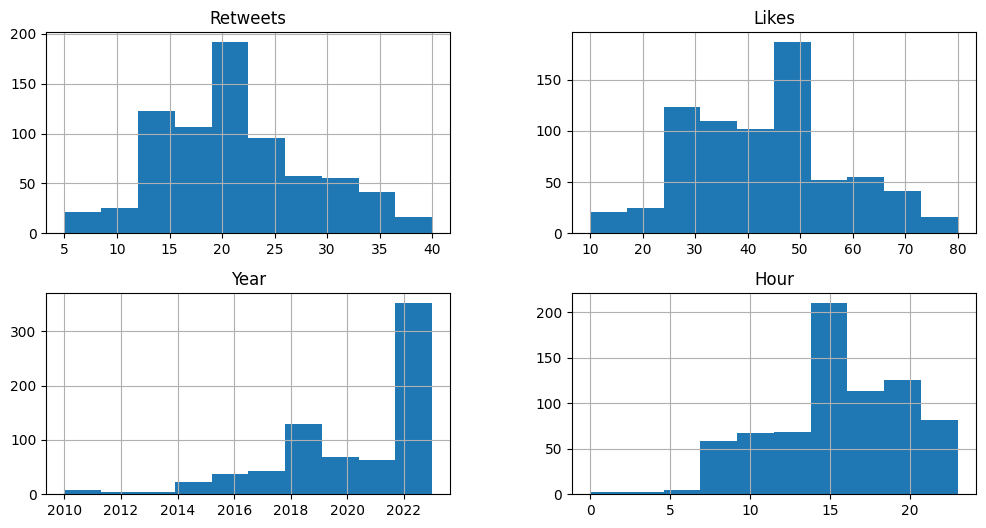

In [136]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['Retweets','Likes','Year', 'Hour']]
viz.hist()
plt.show()

In [137]:
adf = df[['Retweets','Likes','Year', 'Hour','Timestamp']]

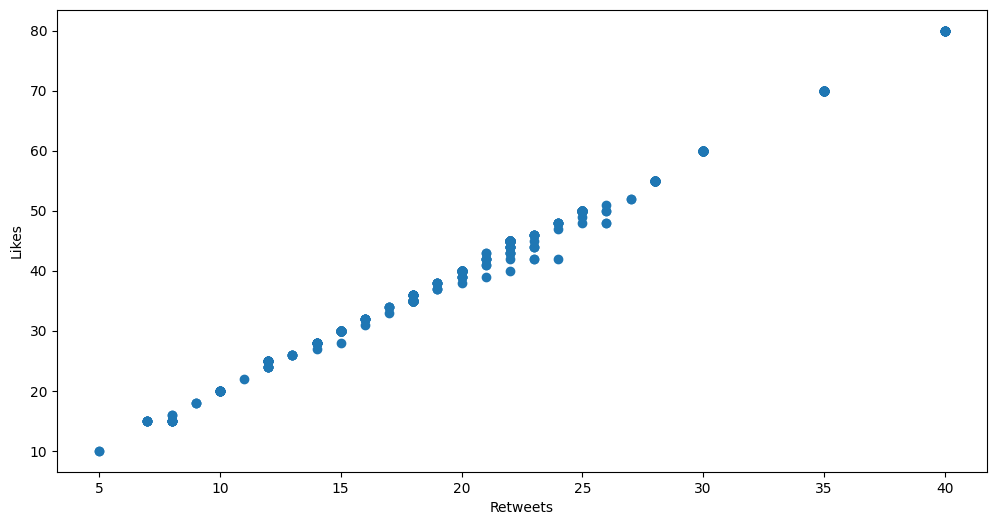

In [138]:
plt.scatter(x=adf['Retweets'], y=adf['Likes'])
plt.xlabel("Retweets")
plt.ylabel("Likes")
plt.show()

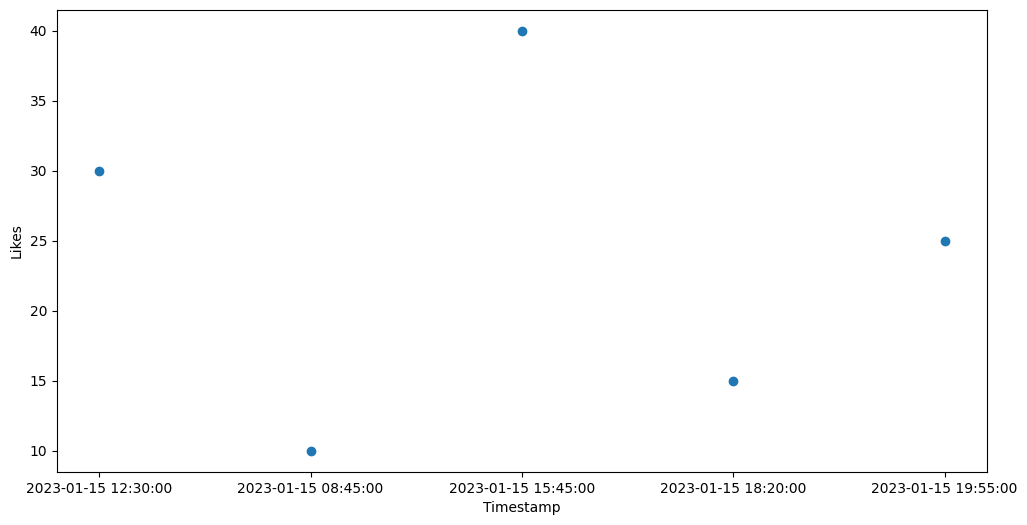

In [139]:
plt.scatter(x=adf['Timestamp'].head(5), y=adf['Likes'].head(5))
plt.xlabel("Timestamp")
plt.ylabel("Likes")
plt.show()

In [140]:
data = {
    'Platform': ['Twitter', 'Instagram', 'Facebook', 'Twitter', 'Instagram', 'Facebook'],
    'Likes': [20, 30, 40, 25, 35, 45],
}

df = pd.DataFrame(data)

# Kategorik verileri sayısal formata dönüştürüyoruz
df['Platform'] = pd.Categorical(df['Platform']).codes

# Eğitim ve test setlerini oluşturuyoruz
X = df[['Platform']]
y = df['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

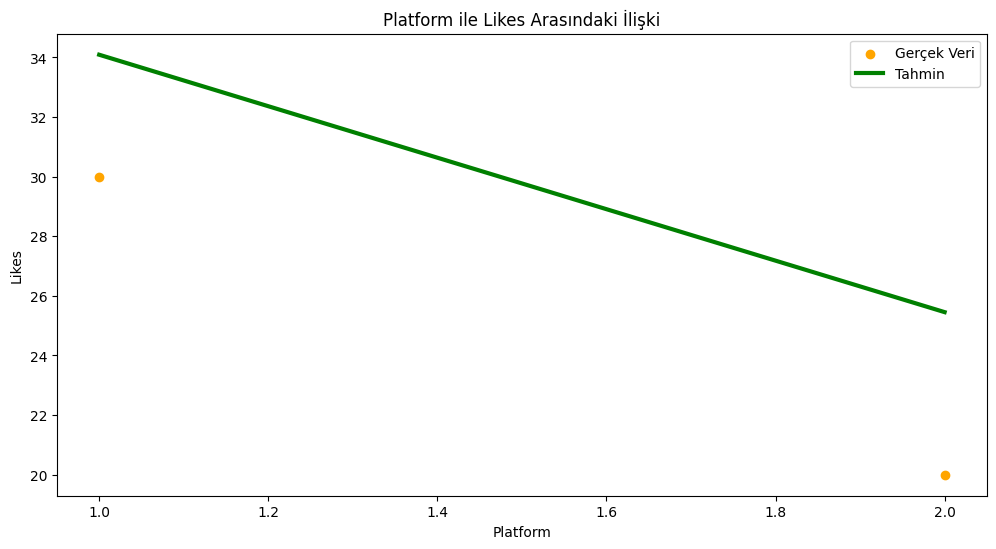

In [141]:

# Lineer Regresyon modelini oluşturuyoruz
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapıyoruz
y_pred = model.predict(X_test)

# Grafik çizimi
plt.scatter(X_test, y_test, color='orange', label='Gerçek Veri')
plt.plot(X_test, y_pred, color='green', linewidth=3, label='Tahmin')
plt.xlabel('Platform')
plt.ylabel('Likes')
plt.title('Platform ile Likes Arasındaki İlişki')
plt.legend()
plt.show()

In [142]:
data = {
    'Text': ["Enjoying a beautiful day at the park!", "Traffic was terrible this morning.", "Just finished an amazing workout!", "Excited about the upcoming weekend getaway!", "Trying out a new recipe for dinner tonight.", "Feeling grateful for the little things in life.", "Rainy days call for cozy blankets and hot cocoa."],
    'Platform': [ "Twitter", "Twitter", "Instagram", "Facebook", "Instagram", "Twitter", "Facebook"],
    'Retweets': [15.0, 5.0, 20.0, 8.0, 12.0, 25.0, 10.0],
    'Likes': [30.0, 10.0, 40.0, 15.0, 25.0, 50.0, 20.0],
    'Country': ["USA", "Canada", "USA", "UK", "Australia", "India", "Canada"],
    'Year': [2023, 2023, 2023, 2023, 2023, 2023, 2023],
    'Hour': [12, 8, 15, 18, 19, 9, 14]
}

In [145]:
df = pd.DataFrame(data)

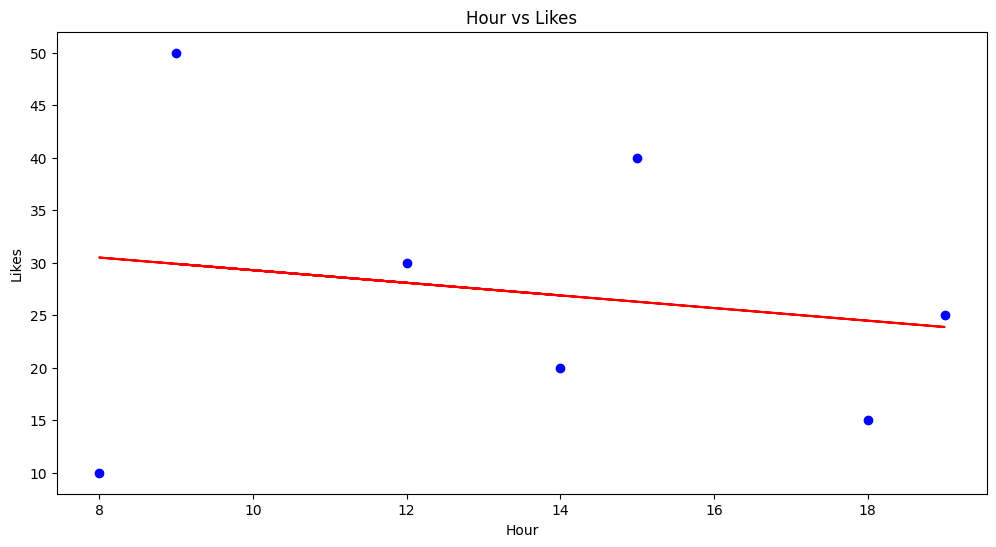

In [146]:

# Bağımsız değişkeni (X) ve bağımlı değişkeni (y) belirliyoruz
X = df[['Hour']]
y = df['Likes']

# Lineer regresyon modelini oluşturuyoruz
model = LinearRegression()
model.fit(X, y)

# Modelin eğim ve y-kesişim katsayılarını alıyoruz
m = model.coef_[0]
c = model.intercept_

# Scatter plot
plt.scatter(df['Hour'], df['Likes'], color="blue")

# Linear regression line
plt.plot(df['Hour'], m * df['Hour'] + c, '-r')

plt.xlabel("Hour")
plt.ylabel("Likes")
plt.title("Hour vs Likes")

plt.show()

In [147]:
data = {
    'Text': ["Enjoying a beautiful day at the park!", "Traffic was terrible this morning.", "Just finished an amazing workout!", "Excited about the upcoming weekend getaway!", "Trying out a new recipe for dinner tonight.", "Feeling grateful for the little things in life.", "Rainy days call for cozy blankets and hot cocoa."],
    'Platform': ["Twitter", "Twitter", "Instagram", "Facebook", "Instagram", "Twitter", "Facebook"],
    'Retweets': [15.0, 5.0, 20.0, 8.0, 12.0, 25.0, 10.0],
    'Likes': [30.0, 10.0, 40.0, 15.0, 25.0, 50.0, 20.0],
    'Country': ["USA", "Canada", "USA", "UK", "Australia", "India", "Canada"],
    'Year': [2023, 2023, 2023, 2023, 2023, 2023, 2023],
    'Hour': [12, 8, 15, 18, 19, 9, 14]
}

In [148]:
df = pd.DataFrame(data)

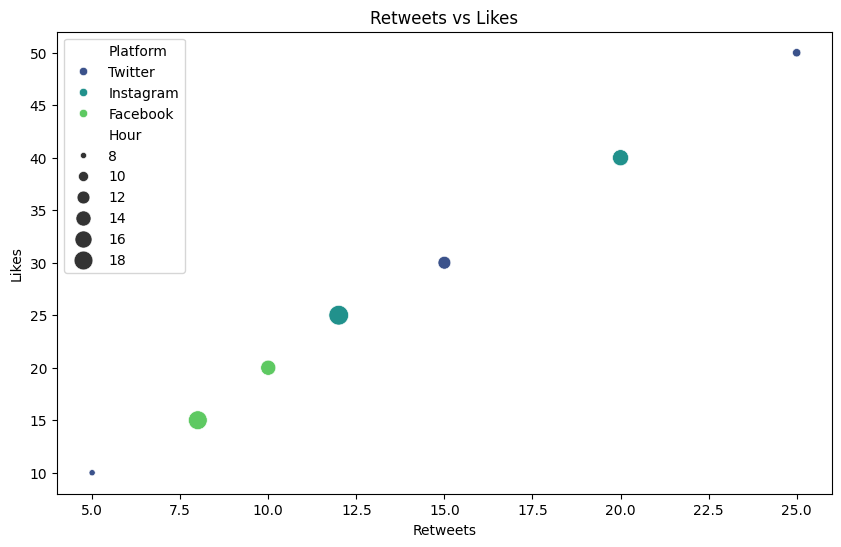

In [149]:
# Scatter plot (Retweets ve Likes arasındaki ilişki)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retweets', y='Likes', data=df, hue='Platform', size='Hour', sizes=(20, 200), palette='viridis')
plt.title('Retweets vs Likes')
plt.show()

C:\Users\victus\AppData\Local\Temp\ipykernel_22156\2069496405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Likes', data=df, palette='Set2')


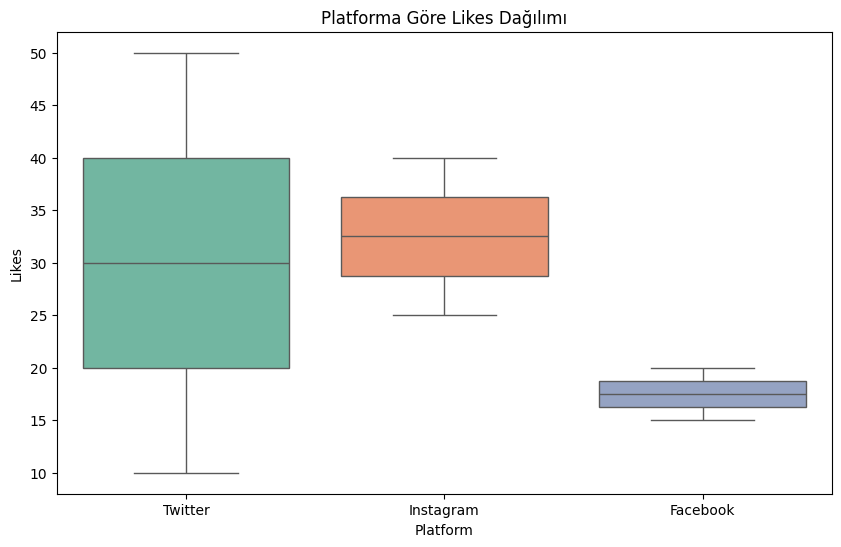

In [150]:
# Platforma göre Likes dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform', y='Likes', data=df, palette='Set2')
plt.title('Platforma Göre Likes Dağılımı')
plt.show()

C:\Users\victus\AppData\Local\Temp\ipykernel_22156\531425135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Retweets', data=df, palette='muted')


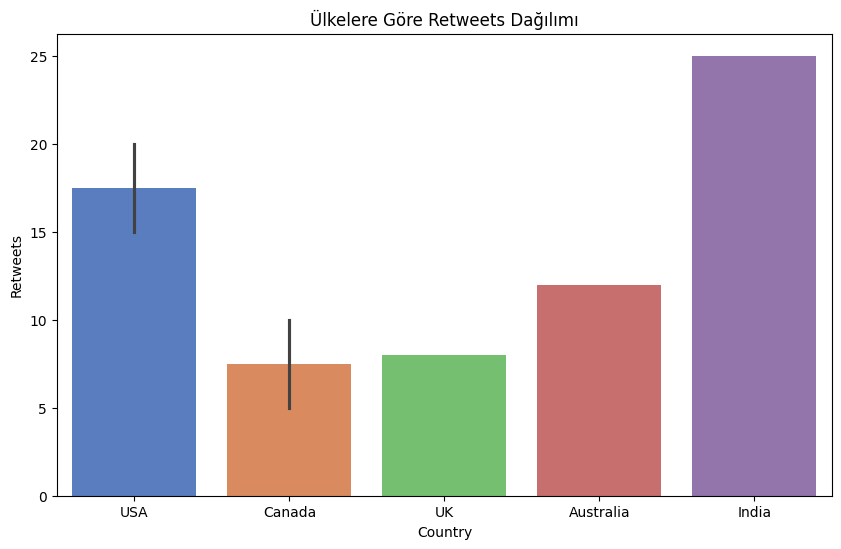

In [151]:
# Ülkelere göre Retweets dağılımı
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Retweets', data=df, palette='muted')
plt.title('Ülkelere Göre Retweets Dağılımı')
plt.show()

In [80]:
from sklearn import linear_model

In [84]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Retweets','Likes','Year', 'Hour']])
y = np.asanyarray(train[['Likes']])
regr.fit(x,y)

LinearRegression()

In [85]:
print(regr.coef_)

[[1.63264547e-15 1.00000000e+00 0.00000000e+00 6.93889390e-17]]


In [90]:
test = pd.DataFrame({
    'Retweets': [10.0, 15.0, 20.0],
    'Likes': [25.0, 30.0, 35.0],
    'Year': [2023, 2023, 2023],
    'Hour': [14, 16, 20],
})

In [108]:
y_hat = regr.predict(test[['Retweets','Likes','Year', 'Hour']])
x = np.asanyarray(test[['Retweets','Likes','Year', 'Hour']])   
y = np.asanyarray(test[['Hour']])

c:\Users\victus\Documents\data.project\.conda\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [109]:
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 180.67
Variance score: -28.04
